In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [14]:
from google.colab import files  # Only works in Colab

uploaded = files.upload()

# Then read it like this
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [15]:
print(df.head())        # First 5 rows
print(df.info())        # Data types, non-null counts
print(df.isnull().sum())  # Total missing values in each column


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [16]:
# Fill missing 'Age' values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column as it has too many missing values
df.drop(columns=['Cabin'], inplace=True)


<ipython-input-16-5f2c4853dedc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-16-5f2c4853dedc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [17]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [18]:
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [19]:
# Convert 'Sex' to 0 (male) and 1 (female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and drop the first category to avoid dummy variable trap
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [20]:
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [21]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [22]:
print(df.head())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
1         1       1    1  0.663861      1      0  0.786845       False   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [23]:
print(df.head())              # Preview cleaned data
print(df.isnull().sum())      # Confirm no missing values
print(df.describe())          # Check ranges and stats


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
1         1       1    1  0.663861      1      0  0.786845       False   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
         Survived      Pclass         Sex           Age       SibSp  \
count  891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean     0.383838    2.308642    0.352413  2.272780e-16    0.523008   
std      0.486592    0.836071    0.477990  1.000562e+00    1.102743   
min      0.000000 

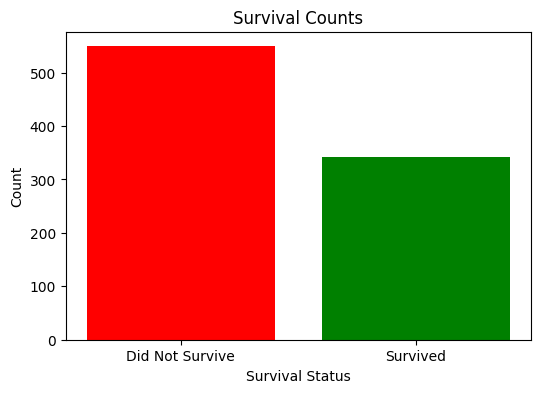

In [24]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called df
survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(survived_counts.index, survived_counts.values, color=['red', 'green'])
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Counts')
plt.show()


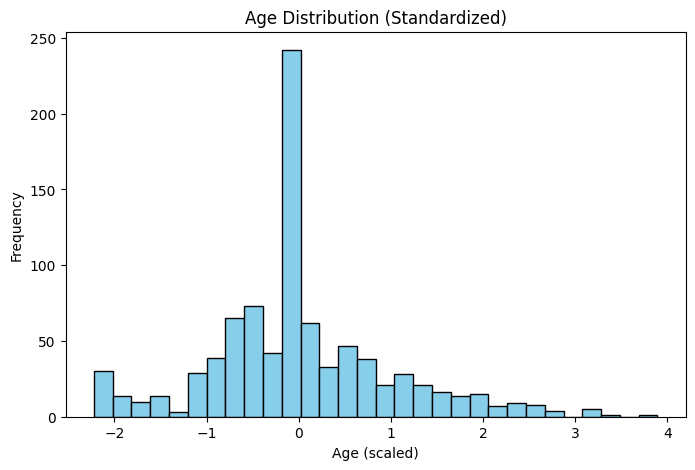

In [25]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution (Standardized)')
plt.xlabel('Age (scaled)')
plt.ylabel('Frequency')
plt.show()


<Figure size 800x500 with 0 Axes>

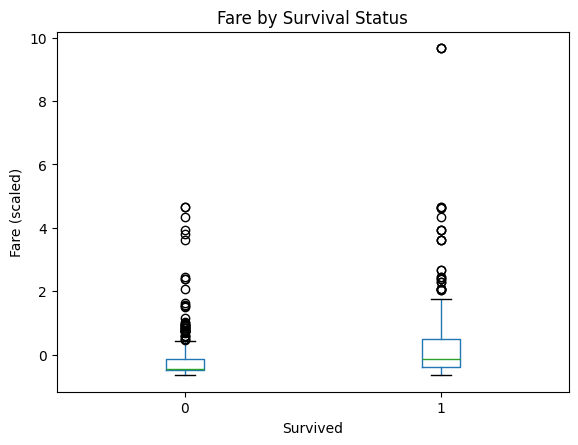

In [26]:
plt.figure(figsize=(8,5))
df.boxplot(column='Fare', by='Survived', grid=False)
plt.title('Fare by Survival Status')
plt.suptitle('')  # to remove the default subtitle
plt.xlabel('Survived')
plt.ylabel('Fare (scaled)')
plt.show()


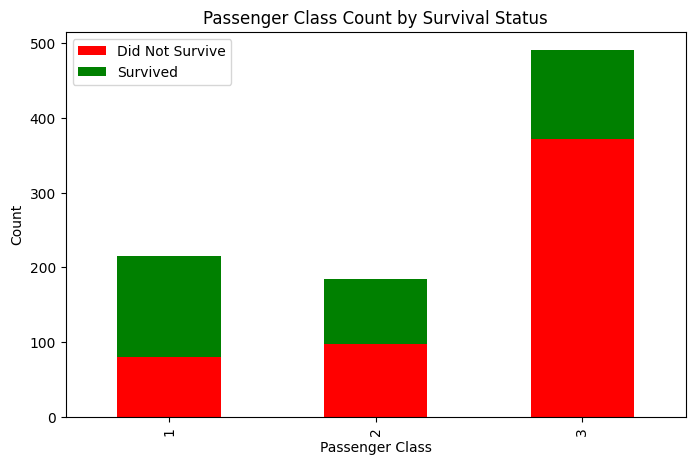

In [27]:
import numpy as np

pclass_survived = pd.crosstab(df['Pclass'], df['Survived'])

pclass_survived.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8,5))
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Count by Survival Status')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()


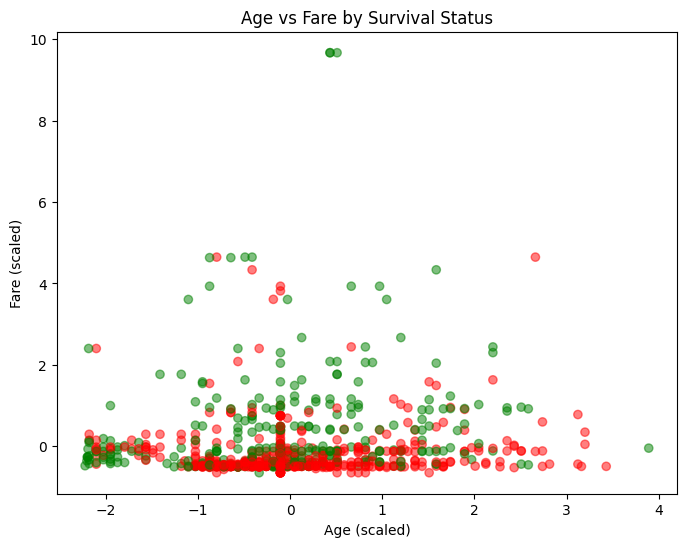

In [28]:
plt.figure(figsize=(8,6))
colors = df['Survived'].map({0:'red', 1:'green'})

plt.scatter(df['Age'], df['Fare'], c=colors, alpha=0.5)
plt.xlabel('Age (scaled)')
plt.ylabel('Fare (scaled)')
plt.title('Age vs Fare by Survival Status')
plt.show()
